In [1]:
from pylab import *
import networkx as nx
import random as rd
%matplotlib inline

In [2]:
# Model 1: original

def original_model():
    
    def initialize():
        global g, time_to_consensus, consensus_reached
        time_to_consensus = 0
        consensus_reached = False
        g = nx.karate_club_graph()
        g.pos = nx.spring_layout(g)
        for i in g.nodes:
            g.nodes[i]['state'] = 1 if random() < .5 else 0

    def observe():
        global g, time_to_consensus, consensus_reached
        cla()
        nx.draw(g, vmin = 0, vmax = 1,
                node_color = [g.nodes[i]['state'] for i in g.nodes],
                pos = g.pos)

    def update():
        global g, time_to_consensus, consensus_reached
        
        listener = rd.choice(list(g.nodes))
        speaker = rd.choice(list(g.neighbors(listener)))
        g.nodes[listener]['state'] = g.nodes[speaker]['state']
        
    def consensus_check():
        global g, time_to_consensus, consensus_reached
        
        zero_state = 0
        for i in g.nodes:
            if g.nodes[i]['state'] == 0:
                zero_state += 1
        if zero_state == 0 or zero_state == len(g.nodes):
            consensus_reached = True
        else:
            time_to_consensus += 1

    initialize()
    while consensus_reached == False:
        update()
        consensus_check()
    # observe()
    
    return time_to_consensus

In [3]:
# Model 2: reversed

def reversed_model():
    
    def initialize():
        global g, time_to_consensus, consensus_reached
        time_to_consensus = 0
        consensus_reached = False
        g = nx.karate_club_graph()
        g.pos = nx.spring_layout(g)
        for i in g.nodes:
            g.nodes[i]['state'] = 1 if random() < .5 else 0

    def observe():
        global g, time_to_consensus, consensus_reached
        cla()
        nx.draw(g, vmin = 0, vmax = 1,
                node_color = [g.nodes[i]['state'] for i in g.nodes],
                pos = g.pos)

    def update():
        global g, time_to_consensus, consensus_reached
        
        speaker = rd.choice(list(g.nodes))
        listener = rd.choice(list(g.neighbors(speaker)))
        g.nodes[listener]['state'] = g.nodes[speaker]['state']
        
    def consensus_check():
        global g, time_to_consensus, consensus_reached
        
        zero_state = 0
        for i in g.nodes:
            if g.nodes[i]['state'] == 0:
                zero_state += 1
        if zero_state == 0 or zero_state == len(g.nodes):
            consensus_reached = True
        else:
            time_to_consensus += 1

    initialize()
    while consensus_reached == False:
        update()
        consensus_check()
    # observe()
    
    return time_to_consensus

In [4]:
# Model 3: edge-based

def edge_based_model():
    
    def initialize():
        global g, time_to_consensus, consensus_reached
        time_to_consensus = 0
        consensus_reached = False
        g = nx.karate_club_graph()
        g.pos = nx.spring_layout(g)
        for i in g.nodes:
            g.nodes[i]['state'] = 1 if random() < .5 else 0

    def observe():
        global g, time_to_consensus, consensus_reached
        cla()
        nx.draw(g, vmin = 0, vmax = 1,
                node_color = [g.nodes[i]['state'] for i in g.nodes],
                pos = g.pos)

    def update():
        global g, time_to_consensus, consensus_reached
        
        edge = list(rd.choice(list(g.edges)))
        listener = rd.choice(edge)
        edge.remove(listener)
        speaker = rd.choice(edge)
        g.nodes[listener]['state'] = g.nodes[speaker]['state']
        
    def consensus_check():
        global g, time_to_consensus, consensus_reached
        
        zero_state = 0
        for i in g.nodes:
            if g.nodes[i]['state'] == 0:
                zero_state += 1
        if zero_state == 0 or zero_state == len(g.nodes):
            consensus_reached = True
        else:
            time_to_consensus += 1

    initialize()
    while consensus_reached == False:
        update()
        consensus_check()
    # observe()
    
    return time_to_consensus

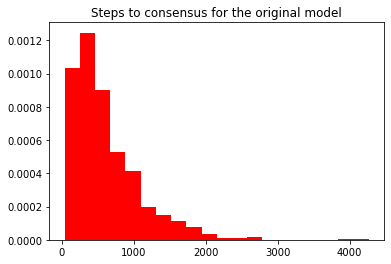

The average time to reach consensus is 613.357 steps, with the 95% confidence interval being [102.97500000000001, 1803.0]


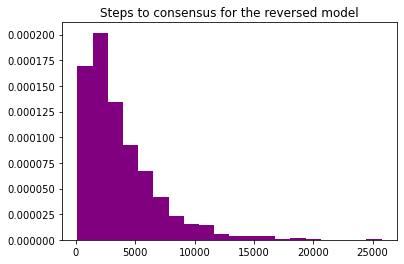

The average time to reach consensus is 3745.455 steps, with the 95% confidence interval being [467.775, 12407.549999999996]


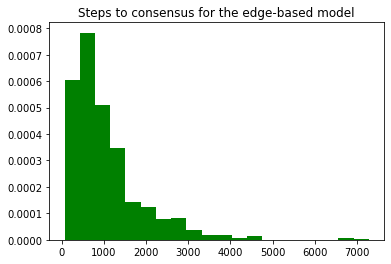

The average time to reach consensus is 1035.756 steps, with the 95% confidence interval being [186.95000000000002, 3250.3249999999994]


In [7]:
results_original = []
results_reversed = []
results_edge_based = []

for i in range(1000):
    results_original.append(original_model())
    results_reversed.append(reversed_model())
    results_edge_based.append(edge_based_model())

plt.hist(results_original, bins = 20, density = True, color = 'red')
plt.title('Steps to consensus for the original model')
plt.show()
print(f'The average time to reach consensus is {np.mean(results_original)} steps, with the 95% confidence interval being [{np.percentile(results_original, 2.5)}, {np.percentile(results_original, 97.5)}]')

plt.hist(results_reversed, bins = 20, density = True, color = 'purple')
plt.title('Steps to consensus for the reversed model')
plt.show()
print(f'The average time to reach consensus is {np.mean(results_reversed)} steps, with the 95% confidence interval being [{np.percentile(results_reversed, 2.5)}, {np.percentile(results_reversed, 97.5)}]')

plt.hist(results_edge_based, bins = 20, density = True, color = 'green')
plt.title('Steps to consensus for the edge-based model')
plt.show()
print(f'The average time to reach consensus is {np.mean(results_edge_based)} steps, with the 95% confidence interval being [{np.percentile(results_edge_based, 2.5)}, {np.percentile(results_edge_based, 97.5)}]')

While the shape of the data distributions for all models is very similar, the mean time to reach consensus differs significantly.

Regarding the average time: the time for the third model (1035.8 steps on average) is almost twice as large as the average time for the first model (613.4 steps); and time for the second model (3745.455 steps) is about three times larger  than the time for the third model and about six times larger than the first model.

Thus, if all three models are good for modelling given scenario, we would prefer the original model due to the fact that the time it takes to reach consensus there on average is the shortest.